<a href="https://colab.research.google.com/github/JVG4M35/Entropia/blob/main/PCA_EMPREGO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Faça upload do seu arquivo .xlsx:


Saving 2020_base_atual.xlsx to 2020_base_atual (11).xlsx
Arquivo carregado: 2020_base_atual (11).xlsx
Primeiras 5 linhas do DataFrame:
   competencia  municipios  admissoes  desligamentos  saldo_movimentacao
0         2020      350010       3120           3431                -311
1         2020      350020        308            256                  52
2         2020      350030       2801           2627                 174
3         2020      350040        450            522                 -72
4         2020      350050       1342           1514                -172

Matriz de Covariância:
[[1.00671141 1.00645381 0.9599312 ]
 [1.00645381 1.00671141 0.95282429]
 [0.9599312  0.95282429 1.00671141]]

Autovalores:
[2.95304681e+00 2.68111178e-16 6.70874176e-02]

Autovetores:
[[-0.581356   -0.7300681  -0.35920157]
 [-0.57998252  0.68145642 -0.44636018]
 [-0.57065355  0.05116354  0.81959552]]

Dois maiores autovalores:
[2.9530468105922063, 0.06708741759571583]

Dois maiores autovetores:
[arra

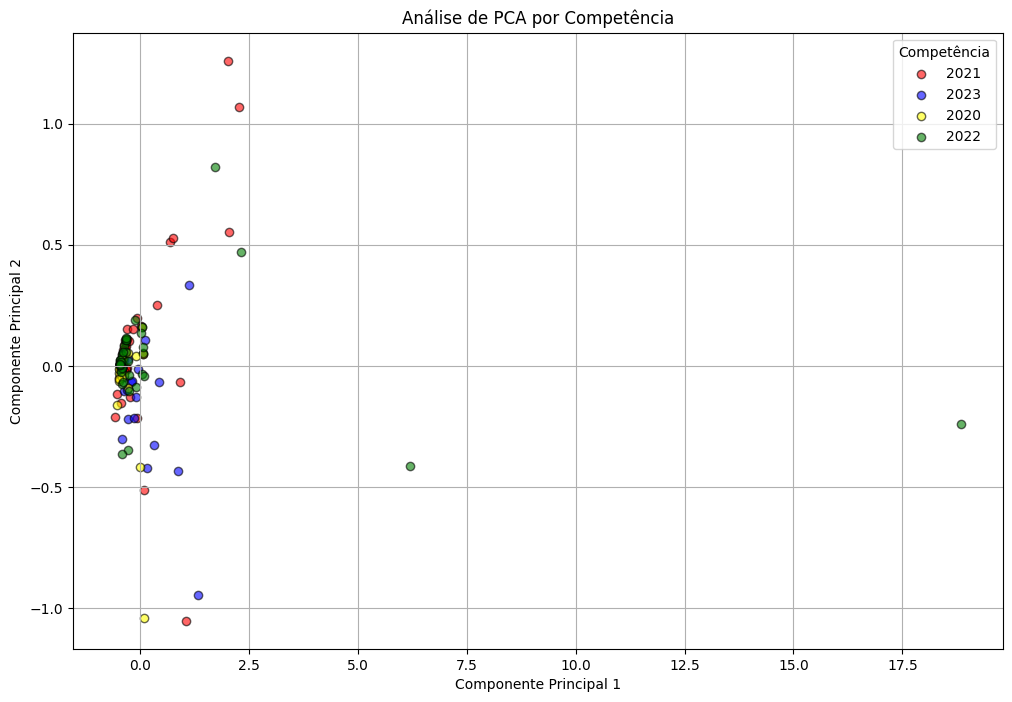

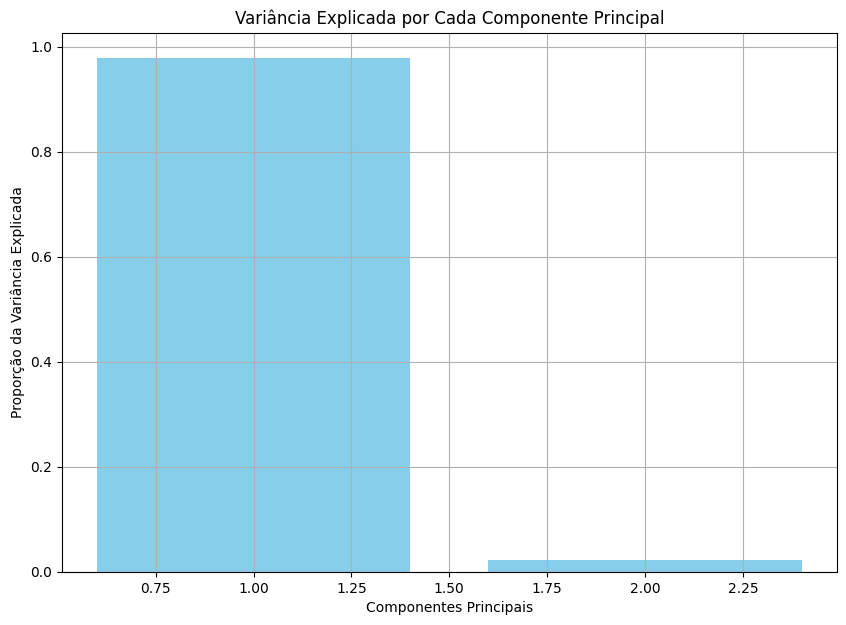

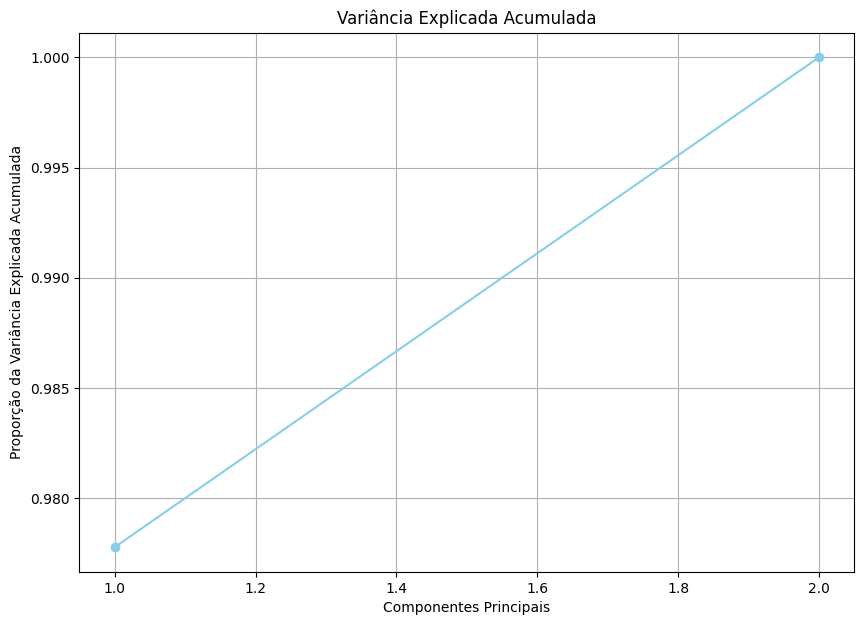


DataFrame com Componentes Principais:
        PC1       PC2  competencia
0 -0.242697 -0.126315         2021
1 -0.364938 -0.103229         2023
2 -0.448489  0.024161         2021
3 -0.478828 -0.027528         2020
4 -0.415888  0.001462         2021

Dados usados na análise para 'admissoes', 'desligamentos', 'saldo_movimentacao':
 admissoes  desligamentos  saldo_movimentacao
      3504           3477                  27
      1967           2009                 -42
       140            105                  35
       158            204                 -46
       665            630                  35
       659            540                 119
      3641           3754                -113
      1297           1342                 -45
       525            523                   2
       373            410                 -37
       734            656                  78
     23350          20055                3295
       633            643                 -10
      4603           4849

In [12]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Carregar arquivo .xlsx
print("Faça upload do seu arquivo .xlsx:")
uploaded = files.upload()

# Verificar o nome do arquivo carregado
file_name = list(uploaded.keys())[0]
print(f"Arquivo carregado: {file_name}")

# Ler o arquivo .xlsx
data = pd.read_excel(file_name)

# Exibir primeiras linhas do DataFrame
print("Primeiras 5 linhas do DataFrame:")
print(data.head())

# Verificar a presença das colunas necessárias
required_columns = ['competencia', 'municipios', 'admissoes', 'desligamentos', 'saldo_movimentacao']
missing_columns = [col for col in required_columns if col not in data.columns]
if missing_columns:
    raise ValueError(f"As seguintes colunas obrigatórias estão faltando: {missing_columns}")

# Selecionar as 3 últimas colunas para análise PCA e incluir município e competência
X = data[['admissoes', 'desligamentos', 'saldo_movimentacao']]
X.columns = ['admissoes', 'desligamentos', 'saldo_movimentacao']
municipios = data['municipios']
competencias = data['competencia']

# Limitar a análise a 150 instâncias aleatórias
X_sampled = X.sample(n=150, random_state=42)
municipios_sampled = municipios.loc[X_sampled.index]
competencias_sampled = competencias.loc[X_sampled.index]

# Tratar valores ausentes para colunas numéricas
numeric_imputer = SimpleImputer(strategy='mean')
X_imputed = numeric_imputer.fit_transform(X_sampled)

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Aplicar PCA com 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Calcular e imprimir a matriz de covariância
cov_matrix = np.cov(X_scaled.T)
print("\nMatriz de Covariância:")
print(cov_matrix)

# Calcular e imprimir os autovalores e autovetores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nAutovalores:")
print(eigenvalues)
print("\nAutovetores:")
print(eigenvectors)

# Ordenar os autovalores e autovetores em ordem decrescente
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Selecionar os dois maiores autovalores e autovetores
top_eigenvalues = [pair[0] for pair in eigen_pairs[:2]]
top_eigenvectors = [pair[1] for pair in eigen_pairs[:2]]

print("\nDois maiores autovalores:")
print(top_eigenvalues)
print("\nDois maiores autovetores:")
print(top_eigenvectors)

# Somar os valores das colunas admissoes, desligamentos e saldo_movimentacao para identificar maiores e menores
X_sums = np.sum(X_imputed, axis=1)
data_sampled = data.loc[X_sampled.index]
data_sampled['sum'] = X_sums

# Encontrar os municípios com maiores e menores somas de dados
municipios_maiores = data_sampled.groupby('municipios')['sum'].sum().sort_values(ascending=False).head()
municipios_menores = data_sampled.groupby('municipios')['sum'].sum().sort_values(ascending=True).head()

print("\nMunicípios com maiores dados usados:")
print(municipios_maiores)
print("\nMunicípios com menores dados usados:")
print(municipios_menores)

# Verificar a presença de valores nulos em 'competencia'
if competencias_sampled.isnull().any():
    raise ValueError("Existem valores nulos na coluna 'competencia'. Certifique-se de que todos os dados estão completos.")

# Mapear cores para as competências
unique_competencias = competencias_sampled.unique()
colors = ['red', 'blue', 'yellow','green']  # Definindo as cores
if len(unique_competencias) > len(colors):
    raise ValueError(f"O número de competências únicas ({len(unique_competencias)}) excede o número de cores definidas ({len(colors)}).")

competencia_colors = {competencia: colors[i] for i, competencia in enumerate(unique_competencias)}

# Plotagem do PCA
plt.figure(figsize=(12, 8))

# Plotar PCA sem exibir municípios
for competencia in unique_competencias:
    competencia_mask = competencias_sampled == competencia
    plt.scatter(X_pca[competencia_mask, 0], X_pca[competencia_mask, 1],
                color=competencia_colors[competencia],
                label=competencia, alpha=0.6, edgecolor='k')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análise de PCA por Competência')
plt.legend(title="Competência")
plt.grid(True)
plt.show()

# Plotagem da variância explicada
plt.figure(figsize=(10, 7))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, color='skyblue')
plt.title('Variância Explicada por Cada Componente Principal')
plt.xlabel('Componentes Principais')
plt.ylabel('Proporção da Variância Explicada')
plt.grid(True)
plt.show()

# Plotagem da variância explicada acumulada
plt.figure(figsize=(10, 7))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', color='skyblue')
plt.title('Variância Explicada Acumulada')
plt.xlabel('Componentes Principais')
plt.ylabel('Proporção da Variância Explicada Acumulada')
plt.grid(True)
plt.show()

# Exibir DataFrame com componentes principais
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
df_pca['competencia'] = competencias_sampled.values
print("\nDataFrame com Componentes Principais:")
print(df_pca.head())

# Exibir todos os dados usados na análise para as instâncias
print("\nDados usados na análise para 'admissoes', 'desligamentos', 'saldo_movimentacao':")
print(X_sampled.to_string(index=False))
